# Capstone Project 


# Import Required Libraries 


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!pip install bs4

!pip install html5lib

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.patches as mpatches

import random
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
from folium.plugins import MiniMap

print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



ImportError: cannot import name 'MiniMap' from 'folium.plugins' (/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/folium/plugins/__init__.py)

# 1. Import and Explore Calgary Neighbourhood Data from: 


Calgary: https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary

### Import and Load the Calgary Neighbourhood Data from the website into the dataframe 

In [2]:
from bs4 import BeautifulSoup
from tqdm import tqdm
from geopy.extra.rate_limiter import RateLimiter
from math import sqrt, pi
import requests
import pandas as pd
import numpy as np
import csv
!pip install lxml
!pip install bs4
!pip install lxml
!pip install geopy
!pip install tqdm
!pip install BeautifulSoup4
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

# All requested packages already installed.



In [3]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary")

In [5]:
len(df)

3

In [6]:
df[0]

,Name[10],Quadrant,Sector[11],Ward[12],Type[11],2012 PopulationRank,Population(2012)[10],Population(2011)[10],% change,Dwellings(2012)[10],Area(km2)[11],Populationdensity
0,Abbeydale,NE/SE,Northeast,10,Residential,82,5917.0,5700.0,3.8,2023.0,1.7,3480.6
1,Acadia,SE,South,9,Residential,27,10705.0,10615.0,0.8,5053.0,3.9,2744.9
2,Albert Park/Radisson Heights,SE,East,10,Residential,75,6234.0,6217.0,0.3,2709.0,2.5,2493.6
3,Altadore,SW,Centre,11,Residential,39,9116.0,8907.0,2.3,4486.0,2.9,3143.4
4,Alyth/Bonnybrook,SE,Centre,9,Industrial,208,16.0,17.0,−5.9,14.0,3.8,4.2
5,Applewood Park,SE/NE,East,10,Residential,69,6498.0,6404.0,1.5,2215.0,1.6,4061.3
6,Arbour Lake,NW,Northwest,2,Residential,26,10836.0,10762.0,0.7,3918.0,4.4,2462.7
7,Aspen Woods,SW,West,6,Residential,92,5271.0,4469.0,17.9,2281.0,3.8,1387.1
8,Auburn Bay,SE,Southeast,12,Residential,60,7193.0,5769.0,24.7,2808.0,4.5,1598.4
9,Aurora Business Park,NE,North,3,Industrial,237,0.0,0.0,—,0.0,2.4,0


In [7]:
calgary=pd.DataFrame(data=df[0])
calgary

,Name[10],Quadrant,Sector[11],Ward[12],Type[11],2012 PopulationRank,Population(2012)[10],Population(2011)[10],% change,Dwellings(2012)[10],Area(km2)[11],Populationdensity
0,Abbeydale,NE/SE,Northeast,10,Residential,82,5917.0,5700.0,3.8,2023.0,1.7,3480.6
1,Acadia,SE,South,9,Residential,27,10705.0,10615.0,0.8,5053.0,3.9,2744.9
2,Albert Park/Radisson Heights,SE,East,10,Residential,75,6234.0,6217.0,0.3,2709.0,2.5,2493.6
3,Altadore,SW,Centre,11,Residential,39,9116.0,8907.0,2.3,4486.0,2.9,3143.4
4,Alyth/Bonnybrook,SE,Centre,9,Industrial,208,16.0,17.0,−5.9,14.0,3.8,4.2
5,Applewood Park,SE/NE,East,10,Residential,69,6498.0,6404.0,1.5,2215.0,1.6,4061.3
6,Arbour Lake,NW,Northwest,2,Residential,26,10836.0,10762.0,0.7,3918.0,4.4,2462.7
7,Aspen Woods,SW,West,6,Residential,92,5271.0,4469.0,17.9,2281.0,3.8,1387.1
8,Auburn Bay,SE,Southeast,12,Residential,60,7193.0,5769.0,24.7,2808.0,4.5,1598.4
9,Aurora Business Park,NE,North,3,Industrial,237,0.0,0.0,—,0.0,2.4,0


In [8]:
calgary_1=calgary.drop(['Quadrant','Sector[11]','Ward[12]','Type[11]','% change','2012 PopulationRank','Population(2011)[10]','Population(2012)[10]','Dwellings(2012)[10]','Area(km2)[11]'],axis=1)
calgary_1


,Name[10],Populationdensity
0,Abbeydale,3480.6
1,Acadia,2744.9
2,Albert Park/Radisson Heights,2493.6
3,Altadore,3143.4
4,Alyth/Bonnybrook,4.2
5,Applewood Park,4061.3
6,Arbour Lake,2462.7
7,Aspen Woods,1387.1
8,Auburn Bay,1598.4
9,Aurora Business Park,0


In [9]:
calgary_raw=calgary_1.rename(columns={'Name[10]':'Neighbourhoods','Populationdensity':'Population Density'})
calgary_raw

,Neighbourhoods,Population Density
0,Abbeydale,3480.6
1,Acadia,2744.9
2,Albert Park/Radisson Heights,2493.6
3,Altadore,3143.4
4,Alyth/Bonnybrook,4.2
5,Applewood Park,4061.3
6,Arbour Lake,2462.7
7,Aspen Woods,1387.1
8,Auburn Bay,1598.4
9,Aurora Business Park,0


In [10]:
calgary_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Neighbourhoods      258 non-null    object
 1   Population Density  256 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [11]:
geolocator = Nominatim(user_agent="Mozilla/76.0")
location = geolocator.geocode("Calgary")
latitude = location.latitude
longitude = location.longitude
print(f"Coordinates of Calgary are {latitude}, {longitude}")


Coordinates of Calgary are 51.0460954, -114.065465


In [12]:
from tqdm import tqdm
from geopy.extra.rate_limiter import RateLimiter

tqdm.pandas()
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
coords = (calgary_raw['Neighbourhoods'] + ' suburb, Calgary').progress_apply(geocode)

100%|██████████| 258/258 [04:20<00:00,  1.01s/it]


In [13]:
calgary_raw["Latitude"] = np.nan
calgary_raw["Longitude"] = np.nan
calgary_raw.head()

,Neighbourhoods,Population Density,Latitude,Longitude
0,Abbeydale,3480.6,NaN,NaN
1,Acadia,2744.9,NaN,NaN
2,Albert Park/Radisson Heights,2493.6,NaN,NaN
3,Altadore,3143.4,NaN,NaN
4,Alyth/Bonnybrook,4.2,NaN,NaN


In [14]:
coords[1][1][0]

50.9686551

In [15]:
type(calgary_raw)

pandas.core.frame.DataFrame

In [16]:
df=pd.DataFrame(coords)
df

,Neighbourhoods
0,"(Abbeydale, Calgary, Alberta, T2A 6N7, Canada,..."
1,"(Acadia, Calgary, Alberta, T2J 1K6, Canada, (5..."
2,"(Albert Park/Radisson Heights, Calgary, Albert..."
3,"(Altadore, Calgary, Alberta, T2T 4H9, Canada, ..."
4,"(Alyth/Bonnybrook, Calgary, Alberta, T2G 3L3, ..."
5,"(Applewood Park, Calgary, Alberta, T2A 7R5, Ca..."
6,"(Arbour Lake, Calgary, Alberta, T3G 4L5, Canad..."
7,"(Aspen Woods, Calgary, Alberta, T3H 0N5, Canad..."
8,"(Auburn Bay, Calgary, Alberta, T3M 0A4, Canada..."
9,"(Aurora Business Park, Calgary, Alberta, T3K 4..."


In [17]:
for index in calgary_raw.index:
    if coords[index] is not None:
        calgary_raw.at[index, 'Latitude'] = coords[index][1][0]
        calgary_raw.at[index, 'Longitude'] = coords[index][1][1]
    
calgary_raw.head

<bound method NDFrame.head of                     Neighbourhoods Population Density   Latitude   Longitude
0                        Abbeydale             3480.6  51.058836 -113.929413
1                           Acadia             2744.9  50.968655 -114.055587
2     Albert Park/Radisson Heights             2493.6  51.044845 -113.990195
3                         Altadore             3143.4  51.015104 -114.100756
4                 Alyth/Bonnybrook                4.2  51.016669 -114.024294
5                   Applewood Park             4061.3  51.044658 -113.928931
6                      Arbour Lake             2462.7  51.136786 -114.202355
7                      Aspen Woods             1387.1  51.043119 -114.210185
8                       Auburn Bay             1598.4  50.890605 -113.959565
9             Aurora Business Park                  0  51.140549 -114.062707
10                     Banff Trail               2558  51.071462 -114.111647
11                        Bankview            

In [18]:
calgary_raw

,Neighbourhoods,Population Density,Latitude,Longitude
0,Abbeydale,3480.6,51.058836,-113.929413
1,Acadia,2744.9,50.968655,-114.055587
2,Albert Park/Radisson Heights,2493.6,51.044845,-113.990195
3,Altadore,3143.4,51.015104,-114.100756
4,Alyth/Bonnybrook,4.2,51.016669,-114.024294
5,Applewood Park,4061.3,51.044658,-113.928931
6,Arbour Lake,2462.7,51.136786,-114.202355
7,Aspen Woods,1387.1,51.043119,-114.210185
8,Auburn Bay,1598.4,50.890605,-113.959565
9,Aurora Business Park,0,51.140549,-114.062707


In [19]:
calgary_raw.dropna(subset=['Latitude'],inplace=True)
calgary_raw

,Neighbourhoods,Population Density,Latitude,Longitude
0,Abbeydale,3480.6,51.058836,-113.929413
1,Acadia,2744.9,50.968655,-114.055587
2,Albert Park/Radisson Heights,2493.6,51.044845,-113.990195
3,Altadore,3143.4,51.015104,-114.100756
4,Alyth/Bonnybrook,4.2,51.016669,-114.024294
5,Applewood Park,4061.3,51.044658,-113.928931
6,Arbour Lake,2462.7,51.136786,-114.202355
7,Aspen Woods,1387.1,51.043119,-114.210185
8,Auburn Bay,1598.4,50.890605,-113.959565
9,Aurora Business Park,0,51.140549,-114.062707


In [20]:
print("{} neighbourhoods found in the city of Calgary.".format(calgary_raw.shape[0]))


211 neighbourhoods found in the city of Calgary.


## Visualize the Neighbourhoods in Calgary 

#### Use geopy library to get the latitude and longitude values of Calgary.
#### In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent yyc_explorer, as shown below.

In [21]:
address = 'Calgary'

geolocator = Nominatim(user_agent="yyc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the city if Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the city if Calgary are 51.0460954, -114.065465.


## Create a map of Calgary with neighborhoods superimposed on top.

In [22]:
# create map of Calgary using latitude and longitude values
map_calgary = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for latitude, longitude, Neighbourhoods in zip(calgary_raw['Latitude'], calgary_raw['Longitude'], calgary_raw['Neighbourhoods']):
    label = '{}'.format(Neighbourhoods)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

Next, start utilizing the Foursquare API to explore the neighborhoods and segment them.

## Define Foursquare Credentials and Version

In [23]:
CLIENT_ID = 'VLLSXH3MHRUZDMUTGWZSJUBCOGCTHYEX0ZUP3WJE2RF4SJ5N' # your Foursquare ID
CLIENT_SECRET = 'MI0RXOQX24LG3LVBK03DIBCDL1X3B02NEP01X0PAOQGEWJHO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VLLSXH3MHRUZDMUTGWZSJUBCOGCTHYEX0ZUP3WJE2RF4SJ5N
CLIENT_SECRET:MI0RXOQX24LG3LVBK03DIBCDL1X3B02NEP01X0PAOQGEWJHO


In [24]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL



'https://api.foursquare.com/v2/venues/explore?&client_id=VLLSXH3MHRUZDMUTGWZSJUBCOGCTHYEX0ZUP3WJE2RF4SJ5N&client_secret=MI0RXOQX24LG3LVBK03DIBCDL1X3B02NEP01X0PAOQGEWJHO&v=20180605&ll=50.9424353,-114.1093591&radius=500&limit=100'

In [25]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '609b391ef6d25f172f292db1'},
 'response': {'headerLocation': 'Woodlands',
  'headerFullLocation': 'Woodlands, Calgary',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 50.9469353045, 'lng': -114.10223071355725},
   'sw': {'lat': 50.9379352955, 'lng': -114.11648748644276}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b2066ddf964a520da3124e3',
       'name': '3 Crowns',
       'location': {'address': '523 Woodpark Blvd SW',
        'lat': 50.94076522497254,
        'lng': -114.10942985486153,
        'labeledLatLngs': [{'label': 'display',
          'lat': 50.94076522497254,
          'lng': -114.10942985486153}],
        'distance': 185,
        'postalCode': 'T2W 4J3',
      

# 2. Explore neighborhoods in Calgary

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
       
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
calgary_venues = getNearbyVenues(names=calgary_raw['Neighbourhoods'],
                                   latitudes=calgary_raw['Latitude'],
                                   longitudes=calgary_raw['Longitude'])

Abbeydale
Acadia
Albert Park/Radisson Heights
Altadore
Alyth/Bonnybrook
Applewood Park
Arbour Lake
Aspen Woods
Auburn Bay
Aurora Business Park
Banff Trail
Bankview
Bayview
Beddington Heights
Bel-Aire
Beltline
Bonavista Downs
Bowness
Braeside
Brentwood
Bridgeland/Riverside
Britannia
Burns Industrial
Cambrian Heights
Canyon Meadows
Capitol Hill
Castleridge
Cedarbrae
Chaparral
Charleswood
Chinatown
Chinook Park
Citadel
Cliff Bungalow
Coach Hill
Collingwood
Copperfield
Coral Springs
Cougar Ridge
Country Hills
Country Hills Village
Coventry Hills
Cranston
Crescent Heights
Crestmont
Dalhousie
Deer Ridge
Deer Run
Diamond Cove
Discovery Ridge
Dover
Downtown Commercial Core
Downtown East Village
Eagle Ridge
Eastfield
Eau Claire
Edgemont
Elbow Park
Elboya
Erin Woods
Erlton
Evanston
Evergreen
Fairview
Fairview Industrial
Falconridge
Foothills
Forest Heights
Forest Lawn
Forest Lawn Industrial
Franklin
Glamorgan
Glenbrook
Glendale
Golden Triangle
Great Plains
Greenview
Greenwood/Greenbriar
Hamptons

### Check the size of the resulting dataframe

In [28]:
print(calgary_venues.shape)
calgary_venues.head()


(1339, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbeydale,51.058836,-113.929413,Subway,51.059239,-113.934423,Sandwich Place
1,Abbeydale,51.058836,-113.929413,Mac's,51.059376,-113.934425,Convenience Store
2,Abbeydale,51.058836,-113.929413,roadside pub,51.059277,-113.934529,Wings Joint
3,Abbeydale,51.058836,-113.929413,Britt's Liquor,51.059529,-113.935057,Liquor Store
4,Acadia,50.968655,-114.055587,A-1 Time Piece Clock Services (mobile),50.968351,-114.057712,Furniture / Home Store


### Check how many venues were returned for each neighborhood


In [29]:
calgary_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbeydale,4,4,4,4,4,4
Acadia,3,3,3,3,3,3
Albert Park/Radisson Heights,4,4,4,4,4,4
Altadore,4,4,4,4,4,4
Alyth/Bonnybrook,4,4,4,4,4,4
Applewood Park,3,3,3,3,3,3
Arbour Lake,6,6,6,6,6,6
Aspen Woods,26,26,26,26,26,26
Auburn Bay,3,3,3,3,3,3


#### Let's find out how many unique categories can be curated from all the returned venues


In [30]:
print('There are {} uniques categories.'.format(len(calgary_venues['Venue Category'].unique())))

There are 226 uniques categories.


# 3. Analyze Each Neighborhood

In [31]:
# one hot encoding
calgary_onehot = pd.get_dummies(calgary_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
calgary_onehot['Neighborhood'] = calgary_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [calgary_onehot.columns[-1]] + list(calgary_onehot.columns[:-1])
calgary_onehot = calgary_onehot[fixed_columns]

calgary_onehot.head()

,Yoga Studio,Airport,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Carpet Store,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Escape Room,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Inn,Insurance Office,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Repair Shop,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Pool,Pool Hall,Portuguese Restaurant,Post Office,Professional & Other Places,Pub,Ramen Restaurant,Real Estate Office,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trade School,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abbeydale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ab

#### Examine the new dataframe size.


In [32]:
calgary_onehot.shape

(1339, 226)

#### Next, group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [33]:
calgary_grouped = calgary_onehot.groupby('Neighborhood').mean().reset_index()
calgary_grouped

,Neighborhood,Yoga Studio,Airport,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Carpet Store,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Escape Room,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Inn,Insurance Office,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Repair Shop,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Pool,Pool Hall,Portuguese Restaurant,Post Office,Professional & Other Places,Pub,Ramen Restaurant,Real Estate Office,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trade School,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint
0,Abbeydale,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

#### Confirm the new size

In [34]:
calgary_grouped.shape

(192, 226)

#### The size of the calgary_grouped dataframe is different from the neighbourhood dataframe, Calgary_raw. Lets find out the missing neighbourhoods.



In [35]:
missing_neighbourhoods = [i for i in calgary_raw['Neighbourhoods'].unique() if i not in calgary_grouped['Neighborhood'].unique()]

missing_neighbourhoods

['Castleridge',
 'Coach Hill',
 'Coventry Hills',
 'Evanston',
 'Greenwood/Greenbriar',
 'Kincora',
 'Mahogany',
 'Monterey Park',
 'Queensland',
 'Saddle Ridge Industrial',
 'Seton',
 'Shepard Industrial',
 'Skyview Ranch',
 'South Foothills',
 'Springbank Hill',
 'Starfield',
 'Stonegate Landing',
 'Stoney 4',
 'Wildwood']

In [36]:
calgary_raw

,Neighbourhoods,Population Density,Latitude,Longitude
0,Abbeydale,3480.6,51.058836,-113.929413
1,Acadia,2744.9,50.968655,-114.055587
2,Albert Park/Radisson Heights,2493.6,51.044845,-113.990195
3,Altadore,3143.4,51.015104,-114.100756
4,Alyth/Bonnybrook,4.2,51.016669,-114.024294
5,Applewood Park,4061.3,51.044658,-113.928931
6,Arbour Lake,2462.7,51.136786,-114.202355
7,Aspen Woods,1387.1,51.043119,-114.210185
8,Auburn Bay,1598.4,50.890605,-113.959565
9,Aurora Business Park,0,51.140549,-114.062707


In [37]:
calgary_raw = calgary_raw[calgary_raw['Neighbourhoods'] != 'Stonegate Landing']
calgary_raw

,Neighbourhoods,Population Density,Latitude,Longitude
0,Abbeydale,3480.6,51.058836,-113.929413
1,Acadia,2744.9,50.968655,-114.055587
2,Albert Park/Radisson Heights,2493.6,51.044845,-113.990195
3,Altadore,3143.4,51.015104,-114.100756
4,Alyth/Bonnybrook,4.2,51.016669,-114.024294
5,Applewood Park,4061.3,51.044658,-113.928931
6,Arbour Lake,2462.7,51.136786,-114.202355
7,Aspen Woods,1387.1,51.043119,-114.210185
8,Auburn Bay,1598.4,50.890605,-113.959565
9,Aurora Business Park,0,51.140549,-114.062707


In [38]:
calgary_raw.shape

(210, 4)

In [107]:
calgary_raw =calgary_raw.drop(['Coach Hill',
 'Coventry Hills',
 'Deer Ridge',
 'Deer Run',
 'Evanston',
 'Foothills',
 'Greenwood/Greenbriar',
 'Kincora',
 'Mahogany',
 'Maple Ridge',
 'Marlborough Park',
 'Monterey Park',
 'Saddle Ridge Industrial',
 'Shepard Industrial',
 'Sherwood',
 'Skyview Ranch',
 'Springbank Hill',
 'Starfield',
 'Stonegate Landing',
 'Walden',
 'Wildwood'],axis=0)

AttributeError: 'NoneType' object has no attribute 'drop'

In [112]:
calgary_raw=calgary_raw.drop([41],axis=0)
calgary_raw

AttributeError: 'NoneType' object has no attribute 'drop'

#### Print each neighborhood along with the top 5 most common venues


In [53]:
num_top_venues = 5

for hood in calgary_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = calgary_grouped[calgary_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbeydale----
               venue  freq
0        Wings Joint  0.25
1  Convenience Store  0.25
2       Liquor Store  0.25
3     Sandwich Place  0.25
4         Playground  0.00


----Acadia----
                        venue  freq
0  Construction & Landscaping  0.33
1      Furniture / Home Store  0.33
2          Athletics & Sports  0.33
3                 Pastry Shop  0.00
4                 Music Store  0.00


----Albert Park/Radisson Heights----
               venue  freq
0      Train Station  0.25
1  Convenience Store  0.25
2        Pizza Place  0.25
3   Asian Restaurant  0.25
4        Yoga Studio  0.00


----Altadore----
              venue  freq
0           Dog Run  0.25
1  Greek Restaurant  0.25
2       Coffee Shop  0.25
3    Massage Studio  0.25
4       Yoga Studio  0.00


----Alyth/Bonnybrook----
                        venue  freq
0  Construction & Landscaping  0.50
1                 Gas Station  0.25
2                  Restaurant  0.25
3                 Yoga Studio  0.00
4   

#### Put that into a _pandas_ dataframe
#### First,write a function to sort the venues in descending order.


In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighborhood'] = calgary_grouped['Neighborhood']

for ind in np.arange(calgary_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(calgary_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbeydale,Wings Joint,Convenience Store,Liquor Store,Sandwich Place,Playground,Paper / Office Supplies Store,Museum,Music Store,Music Venue,New American Restaurant
1,Acadia,Construction & Landscaping,Furniture / Home Store,Athletics & Sports,Pastry Shop,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop
2,Albert Park/Radisson Heights,Train Station,Convenience Store,Pizza Place,Asian Restaurant,Yoga Studio,Paintball Field,Other Repair Shop,Other Great Outdoors,Optical Shop,Nightclub
3,Altadore,Dog Run,Greek Restaurant,Coffee Shop,Massage Studio,Yoga Studio,Paper / Office Supplies Store,Music Store,Music Venue,New American Restaurant,Nightclub
4,Alyth/Bonnybrook,Construction & Landscaping,Gas Station,Restaurant,Yoga Studio,Park,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House
5,Applewood Park,Park,Playground,Liquor Store,Yoga Studio,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House
6,Arbour Lake,Bus Station,Photography Studio,Construction & Landscaping,Grocery Store,Lake,Residential Building (Apartment / Condo),Other Repair Shop,Other Great Outdoors,Optical Shop,Noodle House
7,Aspen Woods,Coffee Shop,Restaurant,Yoga Studio,Pharmacy,Shopping Mall,Cupcake Shop,Sandwich Place,Salon / Barbershop,Pizza Place,Pet Store
8,Auburn Bay,Tennis Court,Lake,Other Repair Shop,Yoga Studio,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub
9,Aurora Business Park,Pharmacy,Convenience Store,Asian Restaurant,Coffee Shop,Supermarket,Gas Station,Vietnamese Restaurant,Nightclub,Paper / Office Supplies Store,Noodle House


In [56]:
neighbourhoods_venues_sorted.shape
print('The dataframe has', neighbourhoods_venues_sorted.shape, 'rows and columns respectively.')


The dataframe has (192, 11) rows and columns respectively.


In [57]:
calgary_raw.shape

(210, 4)

In [58]:
df_station = calgary_venues[calgary_venues['Venue Category'].str.contains('Station$') |
                       calgary_venues['Venue Category'].str.contains('^Bus')]
df_station

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,Albert Park/Radisson Heights,51.044845,-113.990195,Franklin (C-Train),51.047286,-113.993544,Train Station
15,Alyth/Bonnybrook,51.016669,-114.024294,Petro-Canada,51.019681,-114.029170,Gas Station
27,Arbour Lake,51.136786,-114.202355,Bua Stop 8593,51.136296,-114.208513,Bus Station
60,Aurora Business Park,51.140549,-114.062707,Petro-Canada,51.142334,-114.067834,Gas Station
90,Bayview,50.973577,-114.112561,Petro-Canada,50.971303,-114.118588,Gas Station
175,Bridgeland/Riverside,51.053801,-114.044310,Petro-Canada,51.053524,-114.049820,Gas Station
207,Chaparral,50.883594,-114.021265,Mac's,50.886238,-114.025872,Gas Station
208,Chaparral,50.883594,-114.021265,Edward Jones - Financial Advisor: Floyd S Bouchie,50.886533,-114.025723,Business Service
301,Country Hills Village,51.157500,-114.061525,Shell,51.154366,-114.064581,Gas Station
308,Country Hills Village,51.157500,-114.061525,North Pointe Terminal,51.157225,-114.067980,Bus Station


In [59]:
cols = df_station['Neighborhood'].unique()
indice = neighbourhoods_venues_sorted[neighbourhoods_venues_sorted['Neighborhood'].isin(cols)].index.values
neighbourhoods_venues_sorted['Station'] = 'No'
neighbourhoods_venues_sorted.loc[indice, 'Station'] = 'Yes'


neighbourhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
0,Abbeydale,Wings Joint,Convenience Store,Liquor Store,Sandwich Place,Playground,Paper / Office Supplies Store,Museum,Music Store,Music Venue,New American Restaurant,No
1,Acadia,Construction & Landscaping,Furniture / Home Store,Athletics & Sports,Pastry Shop,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop,No
2,Albert Park/Radisson Heights,Train Station,Convenience Store,Pizza Place,Asian Restaurant,Yoga Studio,Paintball Field,Other Repair Shop,Other Great Outdoors,Optical Shop,Nightclub,Yes
3,Altadore,Dog Run,Greek Restaurant,Coffee Shop,Massage Studio,Yoga Studio,Paper / Office Supplies Store,Music Store,Music Venue,New American Restaurant,Nightclub,No
4,Alyth/Bonnybrook,Construction & Landscaping,Gas Station,Restaurant,Yoga Studio,Park,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Yes
5,Applewood Park,Park,Playground,Liquor Store,Yoga Studio,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,No
6,Arbour Lake,Bus Station,Photography Studio,Construction & Landscaping,Grocery Store,Lake,Residential Building (Apartment / Condo),Other Repair Shop,Other Great Outdoors,Optical Shop,Noodle House,Yes
7,Aspen Woods,Coffee Shop,Restaurant,Yoga Studio,Pharmacy,Shopping Mall,Cupcake Shop,Sandwich Place,Salon / Barbershop,Pizza Place,Pet Store,No
8,Auburn Bay,Tennis Court,Lake,Other Repair Shop,Yoga Studio,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,No
9,Aurora Business Park,Pharmacy,Convenience Store,Asian Restaurant,Coffee Shop,Supermarket,Gas Station,Vietnamese Restaurant,Nightclub,Paper / Office Supplies Store,Noodle House,Yes


# 4. Cluster Neighbourhoods

#### Find the number of clusters 

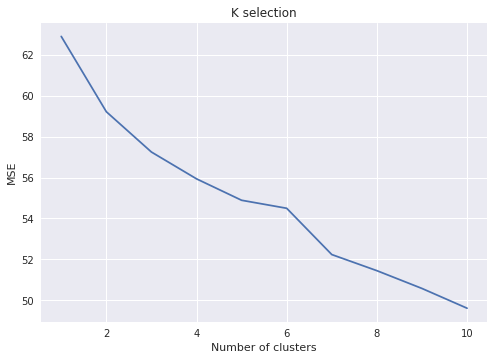

In [60]:
# Finding best k
plt.style.use("seaborn")
Ks = 11
mse = np.zeros((Ks-1))
calgary_grouped_clustering = calgary_grouped.drop(['Neighborhood'], 1)
for n in range(1,Ks):
    
    # set number of clusters
    kclusters = n
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0, init = 'random', n_init = 15).fit(calgary_grouped_clustering)
    mse[n-1] = kmeans.inertia_

plt.plot(range(1,Ks),mse)
plt.xlabel("Number of clusters")
plt.ylabel("MSE")
plt.title("K selection")
plt.show()

#### Run _k_-means to cluster the neighborhood into 5 clusters.


In [61]:
#Run k-means to cluster the neighborhood into 7 clusters

# set number of clusters
kclusters = 6


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, init = 'random',n_init = 15).fit(calgary_grouped_clustering)

calgary_merged = calgary_raw
# add clustering labels
calgary_merged['Cluster Labels'] = kmeans.labels_
calgary_merged



ValueError: Length of values (192) does not match length of index (210)

#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [62]:

calgary_merged = calgary_raw

# add clustering labels
calgary_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
calgary_merged = calgary_merged.join(neighbourhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhoods')

calgary_merged

ValueError: Length of values (192) does not match length of index (210)

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


#### Finally, visualize the resulting clusters


In [63]:


map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(calgary_merged['Latitude'], calgary_merged['Longitude'], calgary_merged['Neighbourhoods'], calgary_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

KeyError: 'Cluster Labels'

# 5. Examine Clusters 

### Cluster 1 

In [64]:
cluster_1=calgary_merged.loc[calgary_merged['Cluster Labels'] == 0, calgary_merged.columns[[0] + list(range(2, calgary_merged.shape[1]))]]
cluster_1

KeyError: 'Cluster Labels'

### Cluster 2 

In [65]:
cluster_2=calgary_merged.loc[calgary_merged['Cluster Labels'] == 1, calgary_merged.columns[[0] + list(range(2, calgary_merged.shape[1]))]]
cluster_2


KeyError: 'Cluster Labels'

### Cluster 3

In [ ]:
cluster_3=calgary_merged.loc[calgary_merged['Cluster Labels'] == 2, calgary_merged.columns[[0] + list(range(2, calgary_merged.shape[1]))]]
cluster_3

### Cluster 4 

In [ ]:
cluster_4=calgary_merged.loc[calgary_merged['Cluster Labels'] == 3, calgary_merged.columns[[0] + list(range(2, calgary_merged.shape[1]))]]
cluster_4

### Cluster 5 

In [ ]:
cluster_5=calgary_merged.loc[calgary_merged['Cluster Labels'] == 4, calgary_merged.columns[[0] + list(range(2, calgary_merged.shape[1]))]]
cluster_5

In [ ]:
cluster_6=calgary_merged.loc[calgary_merged['Cluster Labels'] == 5, calgary_merged.columns[[0] + list(range(2, calgary_merged.shape[1]))]]
cluster_6

# 5. Data Visualization 
## 5.1 Bar Graph of Population Density 

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
#Calgary_merged.hist(column='Population Density')
calgary_merged.plot(kind='bar',x='Neighbourhood',y='Population Density', color=rainbow[cluster])
plt.show()

## 5.2 Venues Bar Graph 

In [ ]:
plot1=calgary_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Cluster Labels')
plot1.set_ylabel('Venue Count')

## 5.3 Word Cloud

In [ ]:
from PIL import Image
import matplotlib.patches as mpatches
! pip install wordcloud
from wordcloud import WordCloud, get_single_color_func

In [ ]:
word_string = ""
for neighborhood in calgary_merged["Neighbourhoods"]:
    elements = ""
    for element in neighborhood.split(","):
        elements += element.strip().replace(" ", "") + " "
    word_string += elements+" "
word_string = word_string.replace(".","")

tmp = cluster_1["Neighbourhoods"].tolist()
cluster_1_list = []
for element in tmp:
    cluster_1_list.extend(element.split(", "))
cluster_1_list = [element.replace(" ","") for element in cluster_1_list]

tmp = cluster_2["Neighbourhoods"].tolist()
cluster_2_list = []
for element in tmp:
    cluster_2_list.extend(element.split(", "))
cluster_2_list = [element.replace(" ","") for element in cluster_2_list]
    
tmp = cluster_3["Neighbourhoods"].tolist()
cluster_3_list = []
for element in tmp:
    cluster_3_list.extend(element.split(", "))
cluster_3_list = [element.replace(" ","") for element in cluster_3_list]
cluster_3_list = [element.replace(".","") for element in cluster_3_list]

tmp = cluster_4["Neighbourhoods"].tolist()
cluster_4_list = []
for element in tmp:
    cluster_4_list.extend(element.split(", "))
cluster_4_list = [element.replace(" ","") for element in cluster_4_list]    

tmp = cluster_5["Neighbourhoods"].tolist()
cluster_5_list = []
for element in tmp:
    cluster_5_list.extend(element.split(", "))
cluster_5_list = [element.replace(" ","") for element in cluster_5_list]

tmp = cluster_6["Neighbourhoods"].tolist()
cluster_6_list = []
for element in tmp:
    cluster_6_list.extend(element.split(", "))
cluster_6_list = [element.replace(" ","") for element in cluster_6_list]

cluster_1_list

In [ ]:
from PIL import Image
import matplotlib.patches as mpatches
from wordcloud import WordCloud, get_single_color_func
class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

wordcloud = WordCloud(width=1000, height=600, background_color='white', max_words = 500).generate(word_string)

color_to_words = {
    # words below will be colored with a green single color function
    'red': cluster_1_list,
    # will be colored with a red single color function
    'purple': cluster_2_list,
    'blue': cluster_3_list,
    'green': cluster_4_list,
    'yellow': cluster_5_list,
    'grey': cluster_6_list
    
}

default_color = 'blue'

print('Word cloud created!')

fig = plt.figure()
fig.set_figwidth(500)
fig.set_figheight(10)

grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wordcloud.recolor(color_func=grouped_color_func)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## 5.4 Bar Chart of Clusters 

In [ ]:
tmp = np.zeros((kmeans.cluster_centers_.shape))
tmp[0,:] = kmeans.cluster_centers_[0,:]
tmp[1,:] = kmeans.cluster_centers_[1,:]
tmp[2,:] = kmeans.cluster_centers_[2,:]
tmp[3,:] = kmeans.cluster_centers_[3,:]
tmp[4,:] = kmeans.cluster_centers_[4,:]
tmp[5,:] = kmeans.cluster_centers_[5,:]
maxi = []
for i in range(6):
    maxi.extend(tmp[i,:].argsort()[-3:][::-1])
    
args = np.asarray(list(set(maxi)))
table = pd.DataFrame(data = tmp[:,args.astype(int)], index = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4','Cluster 5','Cluster 6'], columns = calgary_grouped_clustering.columns[args.astype(int)])
table = table.transpose()

In [ ]:
plt.style.use('seaborn')
ax = table.plot(kind='bar', figsize=(15,6), rot=90, fontsize = 14, colormap = 'Paired')
bars = ax.get_children()
plt.title("Frequency of Ocurrence Within Each Cluster")
plt.ylabel("Frequency")

plt.show()


In [ ]:
maxi = []
for i in range(6):
    maxi.extend(tmp[i,:].argsort()[-3:][::-1])
    
args = np.asarray(list(set(maxi)))
table = pd.DataFrame(data = tmp[:,args.astype(int)], index = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4','Cluster 5','Cluster 6'], columns = calgary_grouped_clustering.columns[args.astype(int)])
table = table.T
table.drop(["Spa","Filipino Restaurant","Gastropub"], inplace= True)

In [ ]:
plt.style.use('seaborn')
ax = table.plot(kind='bar', figsize=(15,6), rot=90, fontsize = 14, colormap = "Paired")
bars = ax.get_children()
plt.title("Frequency of Ocurrence Within Each Cluster Without Spa!")
plt.ylabel("Frequency")
plt.show()